# AKHIL MENON BCSE1717 A70405217012

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
from PIL import Image, ImageOps, ImageDraw, ImageFont
import cv2

### EXP 1: Reading & Writing an Image

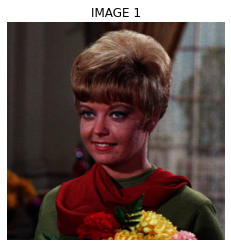

In [38]:
img1 = plt.imread('ImageSet/4.1.01.tiff')
plt.imshow(img1)
plt.axis('off')
plt.title("IMAGE 1")
plt.show()

plt.imsave("img1.png",img1)

### EXP 2:

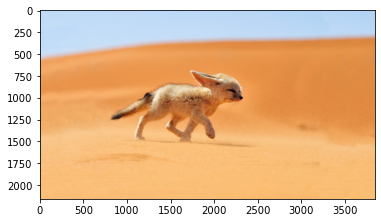

In [39]:
img = Image.open("fox.png")
#img.show()
plt.imshow(img)
plt.show()

#### Flipping an Image

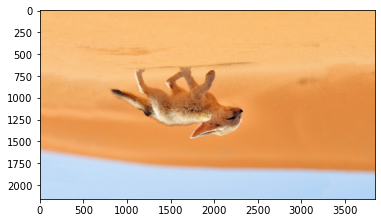

In [40]:
img_flip = ImageOps.flip(img)
#img_flip.show()
img_flip.save("fox_flip.png")
plt.imshow(img_flip)
plt.show()

#### Mirror Image

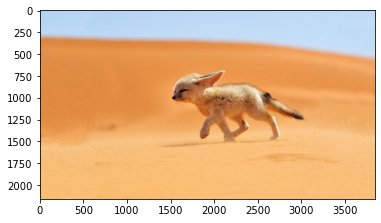

In [41]:
img_mirror = ImageOps.mirror(img)
#img_mirror.show()
img_mirror.save("fox_mirror.png")
plt.imshow(img_mirror)
plt.show()

#### Convert to Grayscale 

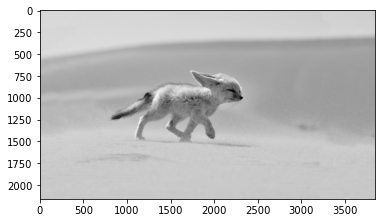

In [22]:
new_img = Image.open("fox.png").convert("L")
#new_img.show()
new_img.save("foxGrey.png")
plt.imshow(new_img,cmap='gray')
plt.show()

#### Writing to Image 

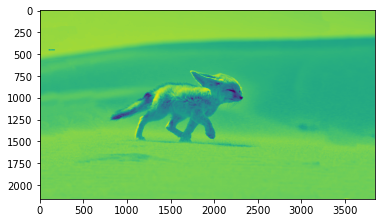

In [23]:
font = ImageFont.truetype('arial.ttf', 5000)
msg = "HELLLOOOOOOO"
color = 'rgb(0,0,0)'
img_text = Image.open("foxGrey.png")
draw = ImageDraw.Draw(img_text)
draw.text((100,450),msg,fill=color)
#img_text.show()
img_text.save("DrawnOnImg.png")
plt.imshow(img_text)
plt.show()

### EXP 3: ROI, Border, Spliting Channels, Arithmetic Operations

#### ROI

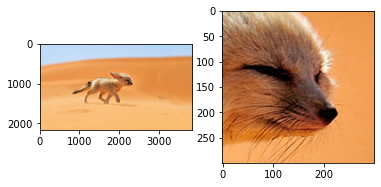

In [24]:
img = plt.imread('fox.png')
img_roi = img[800:1100, 2100:2400]

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img_roi)
plt.show()

#### Image Arithmetic Ops

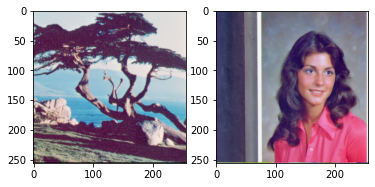

In [25]:
img1 = plt.imread('ImageSet/4.1.06.tiff')
img2 = plt.imread('ImageSet/4.1.04.tiff')
plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

Addition


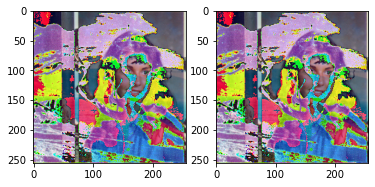


Subtraction


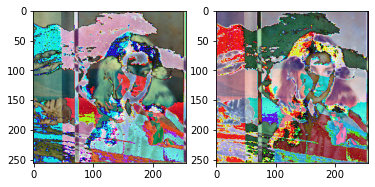


Rolling


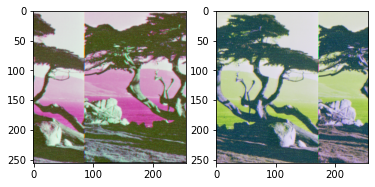


Others


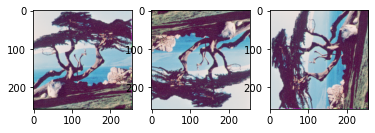

In [26]:
print("Addition")
plt.subplot(1,2,1)
plt.imshow(img1+img2)

plt.subplot(1,2,2)
plt.imshow(img2+img1)
plt.show()

print()
print("Subtraction")
plt.subplot(1,2,1)
plt.imshow(img1-img2)

plt.subplot(1,2,2)
plt.imshow(img2-img1)
plt.show()

print()
print("Rolling")
plt.subplot(1,2,1)
plt.imshow(np.roll(img1,256))

plt.subplot(1,2,2)
plt.imshow(np.roll(img1,2048))
plt.show()

print()
print("Others")
plt.subplot(1,3,1)
plt.imshow(np.fliplr(img1))

plt.subplot(1,3,2)
plt.imshow(np.flipud(img1))

plt.subplot(1,3,3)
plt.imshow(np.rot90(img1))
plt.show()

#### Image Channels

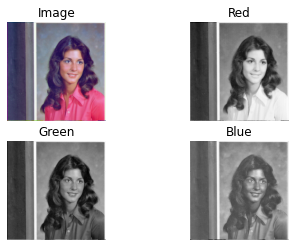

In [27]:
img3 = plt.imread('ImageSet/4.1.04.tiff')
r = img3[:,:,0]
g = img3[:,:,1]
b = img3[:,:,2]

output = [img3, r, g, b]
titles = ['Image', 'Red', 'Green','Blue']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(titles[i])
    if i==0:
        plt.imshow(output[i])
    else:
        plt.imshow(output[i],cmap='gray')
        
plt.show()

#### Bordering

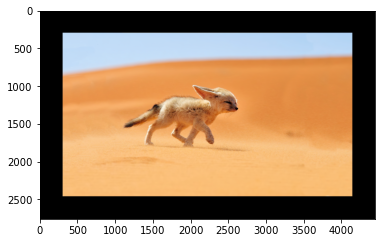

In [28]:
ImageOps.expand(Image.open('fox.png'),border=300,fill='black').save('fox-with-border.png')

img = plt.imread('fox-with-border.png')
plt.imshow(img)
plt.show()

### EXP 4: 

#### Image Negative

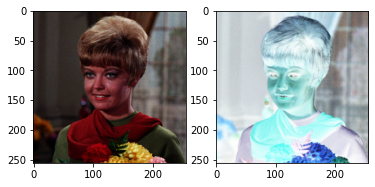

In [29]:
img = Image.open('ImageSet/4.1.01.tiff')
plt.subplot(1,2,1)
plt.imshow(img)

img_invert = ImageOps.invert(img)
plt.subplot(1,2,2)
plt.imshow(img_invert)
plt.show()

#### Log Transformation

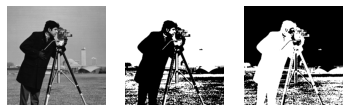

In [30]:
img = data.camera()
thresh = 127

output1 = img > thresh
output2 = img <= thresh

output = [img, output1, output2]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(output[i],cmap='gray')
    plt.axis('off')
plt.show()

#### Gamma Transformation

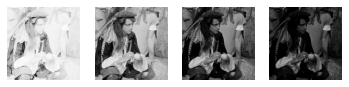

In [31]:
img = plt.imread('ImageSet/5.3.01.tiff')
i=0
for gamma in [0.1, 0.5, 1.2, 2.2]: 
    i+=1
    gamma_img = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
    plt.subplot(1,4,i)
    plt.axis('off')
    plt.imshow(gamma_img,cmap='gray')
plt.show()

#### Intensity Level Slicing

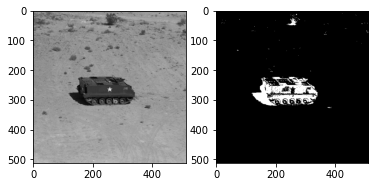

In [32]:
img = plt.imread('ImageSet/7.1.08.tiff')

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')

row, column = img.shape
img1 = np.zeros((row,column),dtype = 'uint8')

min_range = 10
max_range = 60

for i in range(row):
    for j in range(column):
        if img[i,j]>min_range and img[i,j]<max_range:
            img1[i,j] = 255
        else:
            img1[i,j] = 0

plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.show()

#### Contrast Stretching

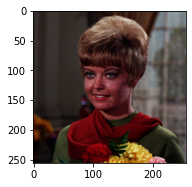

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


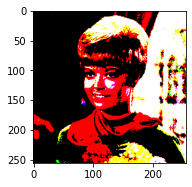

In [33]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

img1 = plt.imread('ImageSet/4.1.01.tiff')
plt.subplot(1,2,1)
plt.imshow(img1)
plt.show()
    
r1 = 70
s1 = 0
r2 = 140
s2 = 255

pixelVal_vec = np.vectorize(pixelVal) 
   
contrast_stretched = pixelVal_vec(img1, r1, s1, r2, s2)

plt.subplot(1,2,2)
plt.imshow(contrast_stretched)
plt.show()

### EXP 5:

#### Smoothening

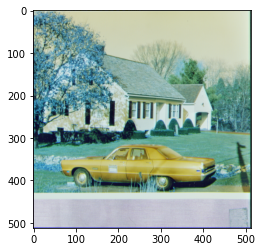

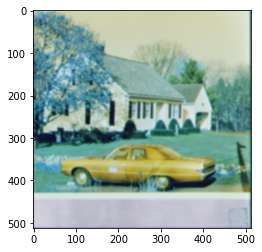

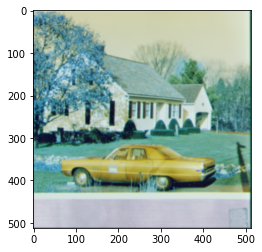

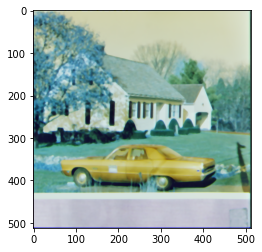

In [34]:
img = cv2.imread('ImageSet/house.tiff')
blur = cv2.blur(img,(5,5))

Gauss = cv2.GaussianBlur(img,(5,5),0)



img_median = cv2.medianBlur(img,5)



plt.imshow(img)
plt.show()

plt.imshow(blur)
plt.show()

plt.imshow(Gauss)
plt.show()

plt.imshow(img_median)
plt.show()

#### Sharpening

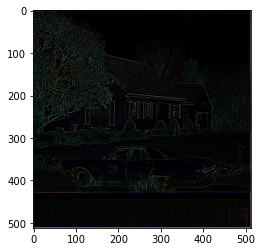

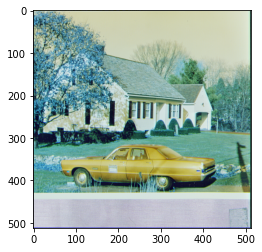

In [35]:
LaplacePic = cv2.Laplacian(img, 24, (5,5))

unsharp_image = cv2.addWeighted(img, 1.5, Gauss, -0.5, 0, img)


plt.imshow(LaplacePic)
plt.show()

plt.imshow(unsharp_image)
plt.show()

#### Noise Removal

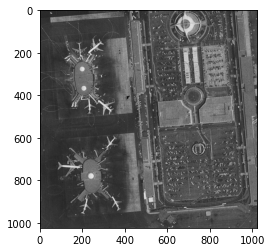

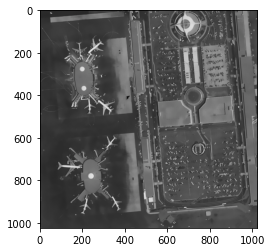

In [3]:
img = cv2.imread('ImageSet/5.3.02.tiff')

plt.imshow(img)
plt.show()

noise_remove = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.imshow(noise_remove)
plt.show()

#### Histogram Processing

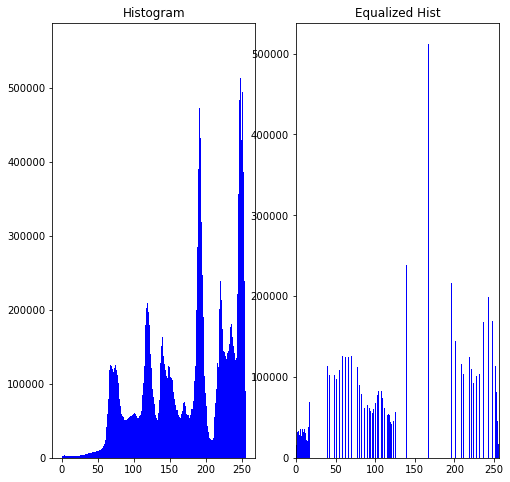

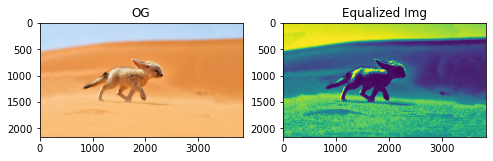

In [4]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
img = cv2.imread('fox.png')
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Histogram Display
hist,bins = np.histogram(src.flatten(),256,[0,256])
ax1.title.set_text('Histogram')
ax1.hist(src.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])

#Histogram Equalization
src = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eqh = cv2.equalizeHist(src)
plt.title('Equalized Hist')
hist,bins = np.histogram(eqh.flatten(),256,[0,256])
plt.hist(eqh.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.title.set_text('OG')
ax1.imshow(src)
ax2.title.set_text('Equalized Img')
ax2.imshow(eqh)
plt.show()